### Zad1

W jednej tabeli języka R należy umieścić wyniki dwóch różnych eksperymentów (t.j. czas działania dwóch różnych funkcji) dla różnych parametrów (t.j. rozmiarów wektora(macierzy)). Tabela powinna zawierać dane z 10-krotnego uruchomienia tego samego eksperymentu dla tych samych parametrów (dla każdego takiego zestawu)

In [2]:
install.packages('tidyverse')
library("tidyverse")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.0     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [3]:
# funkcja do liczenia iloczynu skalarnego vektorow
dot <- function(A, B){
    sum <- 0
    for(i in 1:length(A)){
        sum <- sum + A[i] * B[i]
    }  
    return(sum)
}

In [4]:
# testing dot function
A <- c(2, 4)
B <- c(2, 3)
dot(A, B)

[1] 16

In [5]:
# funkcja mnożenia macierzy kwadratowej przez vektor
matrix_vector_mul <- function(M, V){
    res <- c()
    for(i in 1:length(V)){
        # i-th row in M matrix
        res <- c(res, dot(M[i, ], V))
    }
    return(res)
}


In [6]:
M <- matrix(1:9, nrow = 3, ncol = 3)
V <- c(1, 2, 3)
M

1,4,7
2,5,8
3,6,9


In [7]:
M[1, ]

[1] 1 4 7

In [8]:
V

[1] 1 2 3

In [9]:
dot(M[1, ], V)

[1] 30

In [10]:
# testing matrix vector multiplication
matrix_vector_mul(M, V)

[1] 30 36 42

In [72]:
dot_times <- c()
matrix_vector_times <- c()
for(size in seq(500000,5000000,500000)){
    for(i in 1:10){
        dot_times <- c(dot_times, system.time(dot(sample(100, size, replace=TRUE), sample(100, size, replace=TRUE)))['elapsed'])
    } 
}
for(size in seq(500,5000,500)){
    for(i in 1:10){
        matrix_vector_times <- c(matrix_vector_times, system.time(matrix_vector_mul(matrix(floor(runif(size*size) * 100), nrow = size, ncol = size), sample(100, size, replace=TRUE)))['elapsed'])
    } 
}

In [73]:
dot_times

elapsed elapsed elapsed elapsed elapsed elapsed elapsed elapsed elapsed elapsed 
  0.063   0.062   0.062   0.061   0.064   0.065   0.065   0.060   0.063   0.064 
elapsed elapsed elapsed elapsed elapsed elapsed elapsed elapsed elapsed elapsed 
  0.126   0.132   0.126   0.130   0.127   0.129   0.131   0.130   0.128   0.126 
elapsed elapsed elapsed elapsed elapsed elapsed elapsed elapsed elapsed elapsed 
  0.190   0.187   0.188   0.186   0.186   0.182   0.191   0.186   0.194   0.191 
elapsed elapsed elapsed elapsed elapsed elapsed elapsed elapsed elapsed elapsed 
  0.252   0.256   0.255   0.251   0.249   0.257   0.247   0.258   0.258   0.264 
elapsed elapsed elapsed elapsed elapsed elapsed elapsed elapsed elapsed elapsed 
  0.330   0.310   0.317   0.316   0.315   0.320   0.312   0.318   0.313   0.318 
elapsed elapsed elapsed elapsed elapsed elapsed elapsed elapsed elapsed elapsed 
  0.382   0.377   0.373   0.380   0.376   0.376   0.388   0.392   0.385   0.378 
elapsed elapsed elapsed elapsed elapsed elapsed elapsed elapsed elapsed elapsed 
  0.439   0.437   0.439   0.440   0.439   0.441   0.439   0.439   0.437   0.440 
elapsed elapsed elapsed elapsed elapsed elapsed elapsed elapsed elapsed elapsed 
  0.508   0.506   0.511   0.510   0.512   0.513   0.501   0.507   0.501   0.507 
elapsed elapsed elapsed elapsed elapsed elapsed elapsed elapsed elapsed elapsed 
  0.574   0.576   0.573   0.570   0.572   0.565   0.562   0.561   0.562   0.572 
elapsed elapsed elapsed elapsed elapsed elapsed elapsed elapsed elapsed elapsed 
  0.627   0.628   0.635   0.624   0.642   0.644   0.699   0.672   0.615   0.638

In [14]:
size = 5000
system.time(dot(sample(100, size, replace=TRUE), sample(100, size, replace=TRUE)))['elapsed']

elapsed 
      0

In [75]:
size_dot <- c()
size_matrix <- c()
matrix_val = 500
dot_val = 500000
for(i in 1:10){
    for(j in 1:10){
        size_matrix <- c(size_matrix, matrix_val)
        size_dot <- c(size_dot, dot_val)
    }
    matrix_val <- matrix_val + 500
    dot_val <- dot_val + 500000
}
size_dot
size_matrix

[1]  500000  500000  500000  500000  500000  500000  500000  500000  500000
 [10]  500000 1000000 1000000 1000000 1000000 1000000 1000000 1000000 1000000
 [19] 1000000 1000000 1500000 1500000 1500000 1500000 1500000 1500000 1500000
 [28] 1500000 1500000 1500000 2000000 2000000 2000000 2000000 2000000 2000000
 [37] 2000000 2000000 2000000 2000000 2500000 2500000 2500000 2500000 2500000
 [46] 2500000 2500000 2500000 2500000 2500000 3000000 3000000 3000000 3000000
 [55] 3000000 3000000 3000000 3000000 3000000 3000000 3500000 3500000 3500000
 [64] 3500000 3500000 3500000 3500000 3500000 3500000 3500000 4000000 4000000
 [73] 4000000 4000000 4000000 4000000 4000000 4000000 4000000 4000000 4500000
 [82] 4500000 4500000 4500000 4500000 4500000 4500000 4500000 4500000 4500000
 [91] 5000000 5000000 5000000 5000000 5000000 5000000 5000000 5000000 5000000
[100] 5000000

[1]  500  500  500  500  500  500  500  500  500  500 1000 1000 1000 1000 1000
 [16] 1000 1000 1000 1000 1000 1500 1500 1500 1500 1500 1500 1500 1500 1500 1500
 [31] 2000 2000 2000 2000 2000 2000 2000 2000 2000 2000 2500 2500 2500 2500 2500
 [46] 2500 2500 2500 2500 2500 3000 3000 3000 3000 3000 3000 3000 3000 3000 3000
 [61] 3500 3500 3500 3500 3500 3500 3500 3500 3500 3500 4000 4000 4000 4000 4000
 [76] 4000 4000 4000 4000 4000 4500 4500 4500 4500 4500 4500 4500 4500 4500 4500
 [91] 5000 5000 5000 5000 5000 5000 5000 5000 5000 5000

In [148]:
dot_df <- data.frame(size=size_dot, type="dot_times", time=dot_times)
matrix_df <- data.frame(size=size_matrix, type="matrix_times", time=matrix_vector_times)
matrix_df

size,type,time
<dbl>,<chr>,<dbl>
500,matrix_times,0.019
500,matrix_times,0.022
500,matrix_times,0.021
500,matrix_times,0.021
500,matrix_times,0.023
500,matrix_times,0.022
500,matrix_times,0.029
500,matrix_times,0.019
500,matrix_times,0.023


In [149]:
dot_df

size,type,time
<dbl>,<chr>,<dbl>
500000,dot_times,0.063
500000,dot_times,0.062
500000,dot_times,0.062
500000,dot_times,0.061
500000,dot_times,0.064
500000,dot_times,0.065
500000,dot_times,0.065
500000,dot_times,0.060
500000,dot_times,0.063


In [151]:
merged_df = rbind(dot_df, matrix_df)
merged_df

size,type,time
<dbl>,<chr>,<dbl>
500000,dot_times,0.063
500000,dot_times,0.062
500000,dot_times,0.062
500000,dot_times,0.061
500000,dot_times,0.064
500000,dot_times,0.065
500000,dot_times,0.065
500000,dot_times,0.060
500000,dot_times,0.063


### Zad 2 Należy przedstawić wykresy średnich czasów obliczenia wybranych funkcji w zależności od rozmiaru wektora (macierzy)

In [152]:
avg_dot_results <- aggregate(time ~ size:type, data=dot_df, FUN=mean)
avg_matrix_results <- aggregate(time ~ size:type, data = matrix_df, FUN=mean)
avg_matrix_results

size,type,time
<dbl>,<chr>,<dbl>
500,matrix_times,0.0223
1000,matrix_times,0.0920
1500,matrix_times,0.1918
2000,matrix_times,0.3246
2500,matrix_times,0.5664
3000,matrix_times,0.8122
3500,matrix_times,1.0648
4000,matrix_times,1.3982
4500,matrix_times,1.9319


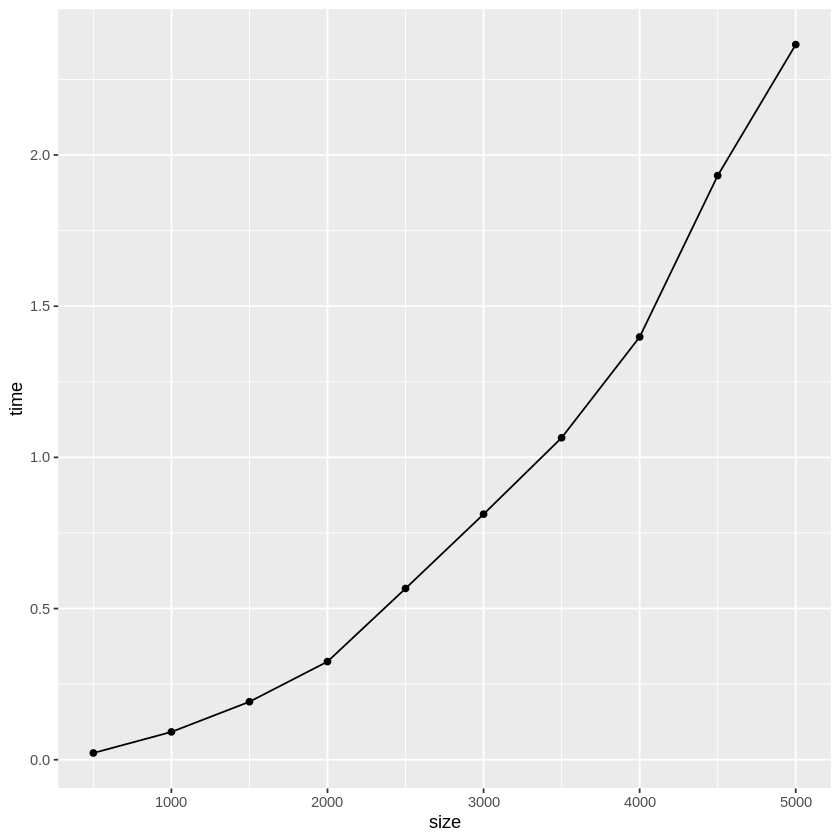

In [154]:
matrix_plot <- ggplot(avg_matrix_results, aes(x=size, y=time)) + geom_point() + geom_line()
matrix_plot

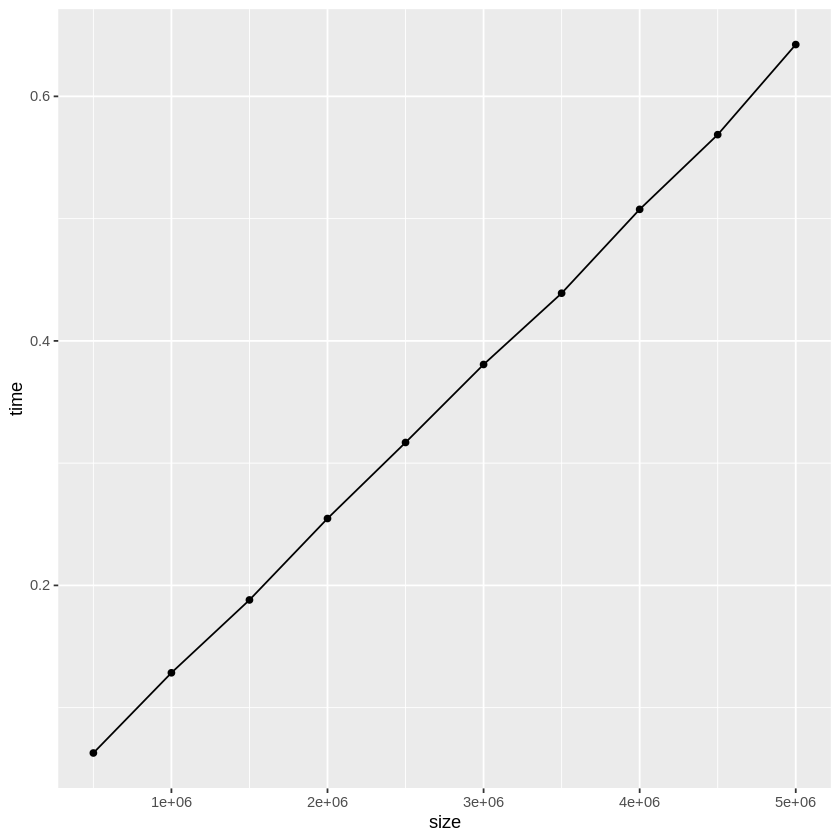

In [155]:
dot_plot <- ggplot(avg_dot_results, aes(x=size, y=time)) + geom_point() + geom_line()
dot_plot

### Zad 3 Dodac slupki bledu

In [156]:
better_matrix <- matrix_df %>% 
    group_by(size, type) %>%
    summarise(
        time_sd = sd(time),
        time = mean(time),
    )  %>% 
    ungroup() %>%
    arrange(type, size)
better_matrix

`summarise()` has grouped output by 'size'. You can override using the `.groups` argument.



size,type,time_sd,time
<dbl>,<chr>,<dbl>,<dbl>
500,matrix_times,0.002869379,0.0223
1000,matrix_times,0.004447221,0.0920
1500,matrix_times,0.011183321,0.1918
2000,matrix_times,0.015812794,0.3246
2500,matrix_times,0.050469353,0.5664
3000,matrix_times,0.055328915,0.8122
3500,matrix_times,0.045849512,1.0648
4000,matrix_times,0.036067221,1.3982
4500,matrix_times,0.063072181,1.9319


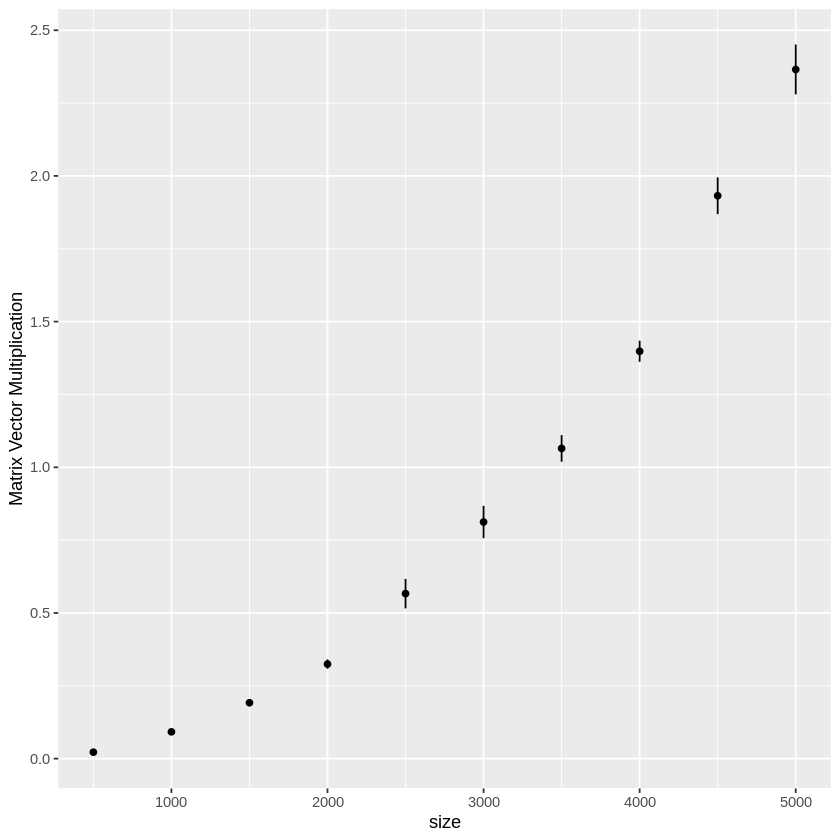

In [157]:
matrix_plot <- ggplot(better_matrix, aes(x=size, y=time)) + geom_point() + ylab("Matrix Vector Multiplication") + 
    geom_errorbar(aes(ymin = time-time_sd, ymax = time+time_sd, width=.25))
matrix_plot

In [158]:
better_dot <- dot_df %>% 
    group_by(size, type) %>%
    summarise(
        time_sd = sd(time),
        time = mean(time),
    )  %>% 
    ungroup() %>%
    arrange(type, size)
better_dot

`summarise()` has grouped output by 'size'. You can override using the `.groups` argument.



size,type,time_sd,time
<dbl>,<chr>,<dbl>,<dbl>
500000,dot_times,0.001663330,0.0629
1000000,dot_times,0.002223611,0.1285
1500000,dot_times,0.003446415,0.1881
2000000,dot_times,0.005034327,0.2547
2500000,dot_times,0.005526703,0.3169
3000000,dot_times,0.006019413,0.3807
3500000,dot_times,0.001247219,0.4390
4000000,dot_times,0.004168666,0.5076
4500000,dot_times,0.005638164,0.5687


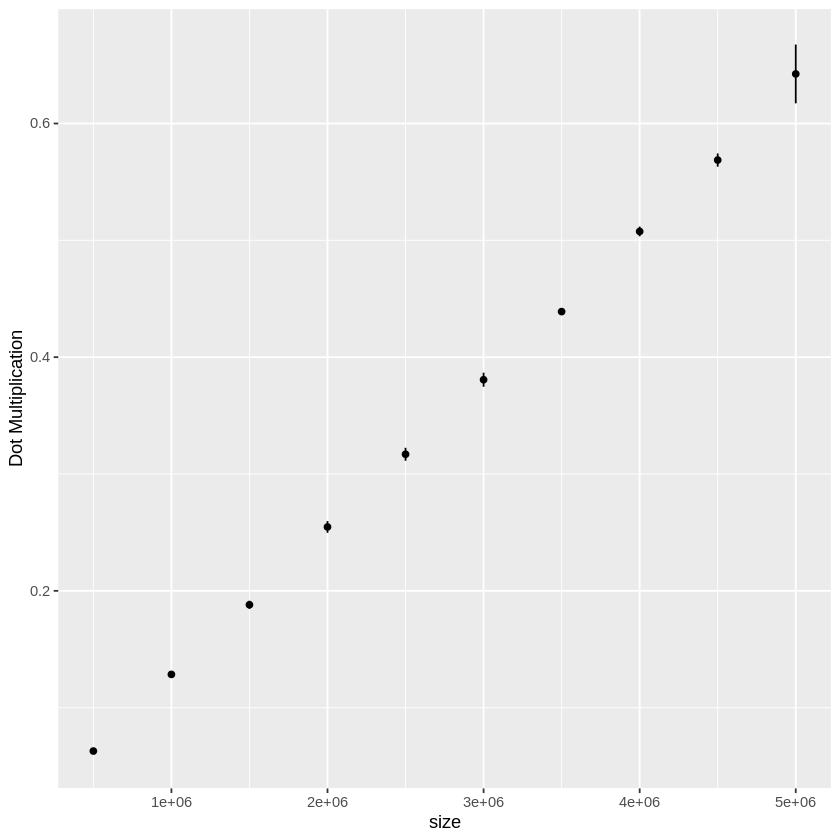

In [159]:
dot_plot <- ggplot(better_dot, aes(x=size, y=time)) + geom_point() + ylab("Dot Multiplication") + 
    geom_errorbar(aes(ymin = time-time_sd, ymax = time+time_sd, width=.25))
dot_plot

### Zad 4 Użyć aproksymacji wielomianowej dostępnej w języku R do znalezienia odpowiednich wielomianów, które najlepiej pasują do wyników każdego z algorytmów. Dodać wykresy uzyskanych wielomianow do wykresu.

### Fit Dot Function

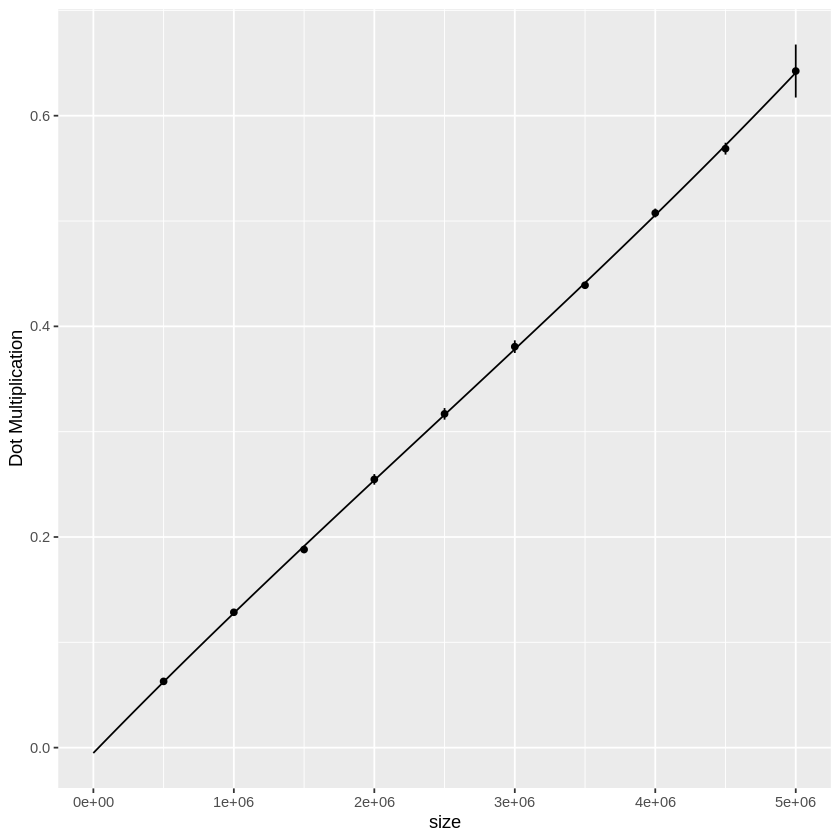

In [163]:
x = avg_dot_results$size
y = avg_dot_results$time
mydata <- data.frame(x, y)
fit = lm(y ~ poly(x, 3, raw=TRUE), data=mydata)

newdata = data.frame(x = seq(0,5000000, length.out=100000))
newdata$y = predict(fit, newdata)

fit_dot_plot <- geom_line(data=newdata, aes(x,y))
dot_plot + fit_dot_plot

### Fit Matrix Function

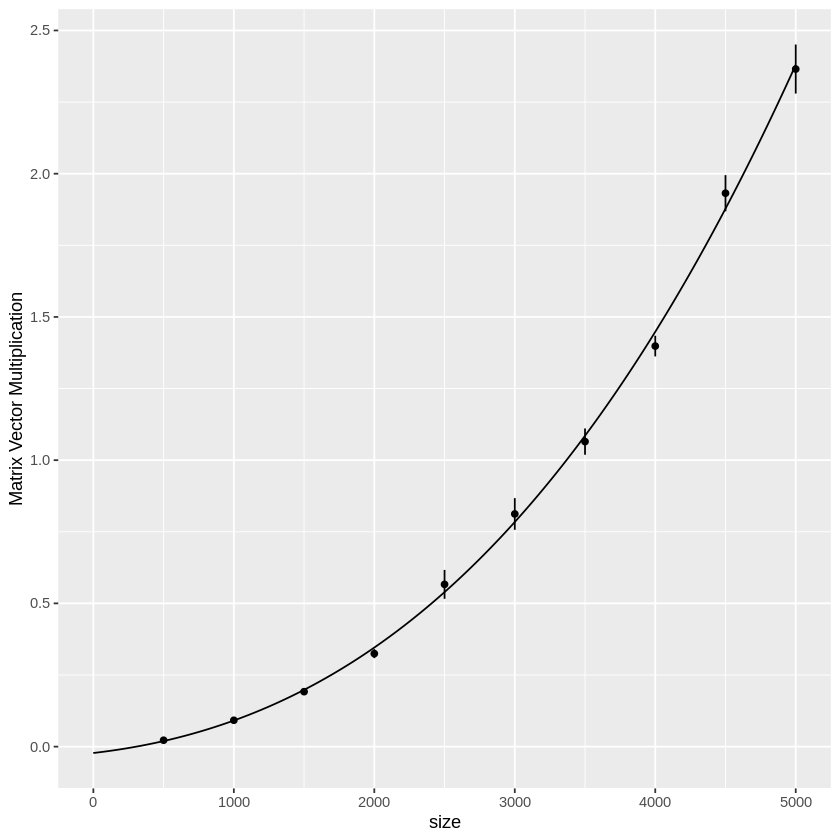

In [161]:
x = avg_matrix_results$size
y = avg_matrix_results$time
mydata <- data.frame(x, y)
fit = lm(y ~ poly(x, 3, raw=TRUE), data=mydata)

newdata = data.frame(x = seq(0,5000, length.out=100000))
newdata$y = predict(fit, newdata)

fit_matrix_plot <- geom_line(data=newdata, aes(x,y))
matrix_plot + fit_matrix_plot

### Zad 5

In [164]:
df <- ..........("https://docs.google.com/spreadsheets/d/1ZIdpVF5AfbkFvGxey92RQLjRVWF8_oWN5-hSbFDL8g0/htmlview", 
                 header = FALSE, 
                 sep="/", 
                 strip.white = TRUE,
                 na.strings = "EMPTY")

# Print out `df`
print(..)

ERROR: Error in ..........("https://docs.google.com/spreadsheets/d/1ZIdpVF5AfbkFvGxey92RQLjRVWF8_oWN5-hSbFDL8g0/htmlview", : could not find function ".........."
